# Code 1 - Basics
- Ollama
- Langraph

### Referances
- https://langchain-ai.github.io/langgraph/tutorials/introduction/

## Step 1 - Import Packages

### Import Packages

In [10]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

## Step 2 - Install and Import tools

In [1]:
%%capture --no-stderr
%pip install -U tavily-python
%pip install -U langchain_community

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
os.getenv("TAVILY_API_KEY")

'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'

### Import Tool

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

### Test Tool

In [19]:
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://adasci.org/a-practical-guide-to-building-ai-agents-with-langgraph/',
  'content': 'LangGraph uses a smart graph algorithm that processes information by passing messages between different points, or "nodes," in a network. Each node represents a point that can perform a task. When a node finishes its task, it sends a message to one or more other nodes, performing their own tasks and passing on the results to the next nodes, creating a chain of tasks. This process happens ...'},
 {'url': 'https://medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48',
  'content': 'Each node in a LangGraph graph has the ability to access, read, and write to the state. When a node modifies the state, it effectively broadcasts this information to all other nodes within the graph.'}]

## Step 3 - Create Graph

### Create State

In [11]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

### Add Chat Bot node

In [16]:
#from langchain_ollama.llms import OllamaLLM
#llm = OllamaLLM(model="llama3.1")  # mixtral
from langchain_community.chat_models import ChatOllama
llm = ChatOllama(model="llama3.1")  # mixtral

In [20]:
llm_with_tools = llm.bind_tools(tools)

NotImplementedError: 

### Build Graph

In [5]:
graph_builder.add_edge(START, "chatbot")

In [6]:
graph_builder.add_edge("chatbot", END)

### Compile Graph

In [7]:
graph = graph_builder.compile()

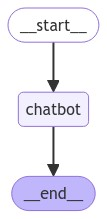

In [13]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Step 3 - Execute ChatBot

In [16]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"])

User:  what is red?


Assistant: ['That\'s a broad question!\n\nRed can be many things, depending on the context. Here are a few examples:\n\n* A color: Red is a vibrant and warm color that exists in the visible spectrum of light.\n* An emotion: Red is often associated with strong emotions like love, passion, anger, or excitement.\n* A warning sign: In many cultures, red is used as a warning signal, indicating danger, caution, or alarm (e.g., traffic lights, warning signs).\n* A flavor: Red can also refer to the taste of something, like cherry or strawberry flavors.\n* A fruit or vegetable: There are many types of fruits and vegetables that are red in color, such as apples, tomatoes, and strawberries.\n\nWhich one of these meanings were you thinking of? Or is there another context where "red" comes up for you?']


User:  quit


Goodbye!


# END - Next Topic - SQL Agents